In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
print("\n1. LOADING AND PREPROCESSING")
print("-" * 80)


1. LOADING AND PREPROCESSING
--------------------------------------------------------------------------------


In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df[df.duplicated]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: >

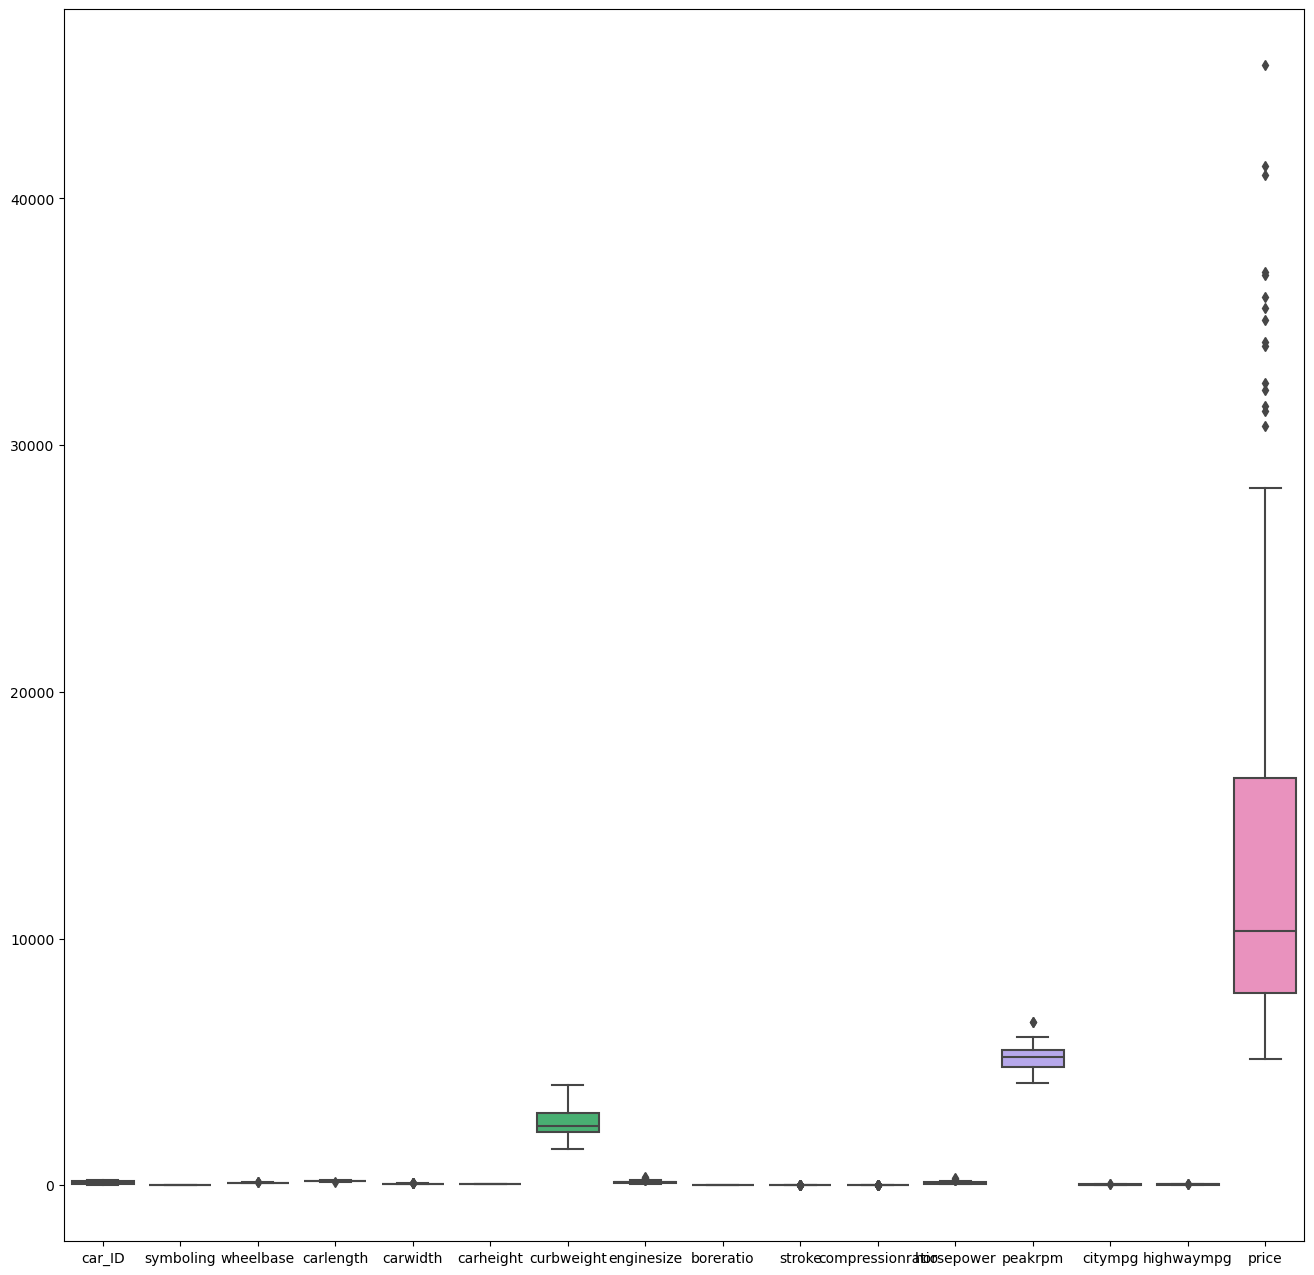

In [8]:
plt.figure(figsize=(16,16))
sns.boxplot(df)

C:\Users\a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

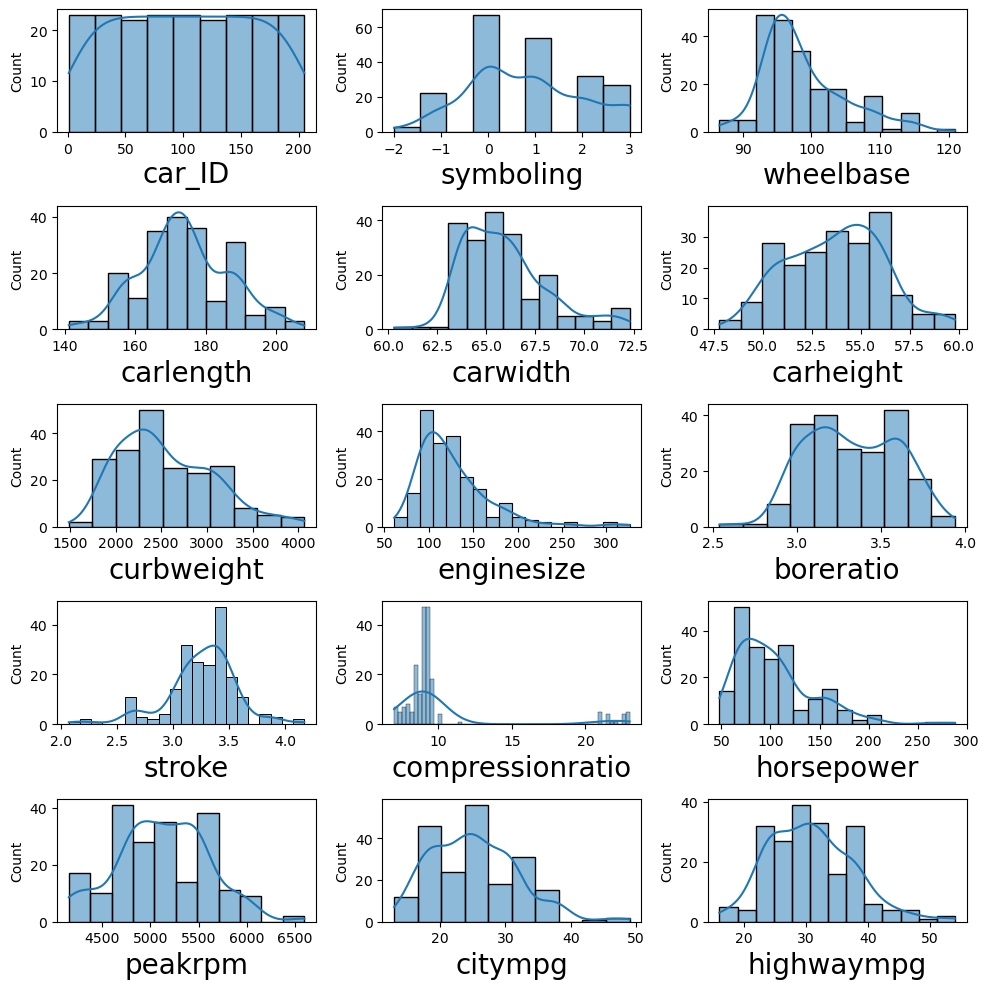

In [9]:
neumeric_column = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,10))
plotnumber =1
for column in neumeric_column:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(neumeric_column[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.drop(columns=["car_ID","CarName"],axis=1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
df.drop(columns=["car_ID","CarName"],axis=1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [14]:
from sklearn.preprocessing import LabelEncoder
le_fl = LabelEncoder()

In [15]:
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [16]:
df["fueltype"]=le_fl.fit_transform(df["fueltype"])

In [17]:
df["fueltype"].unique()

array([1, 0])

In [18]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [19]:
le_asp=LabelEncoder()

In [20]:
df["aspiration"]=le_asp.fit_transform(df["aspiration"])

In [21]:
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [22]:
le_door=LabelEncoder()

In [23]:
df["doornumber"]=le_door.fit_transform(df["doornumber"])

In [24]:
df["doornumber"].dtype

dtype('int32')

In [25]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [26]:
le_carbody=LabelEncoder()
df["carbody"]=le_carbody.fit_transform(df["carbody"])

In [27]:
df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [28]:
le_drivewheel=LabelEncoder()

In [29]:
df["drivewheel"]=le_drivewheel.fit_transform(df["drivewheel"])

In [30]:
df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [31]:
le_enginelocation=LabelEncoder()
df["enginelocation"]=le_enginelocation.fit_transform(df["enginelocation"])

In [32]:
df["wheelbase"].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [33]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [34]:
le_fuelsystem=LabelEncoder()
df["fuelsystem"]=le_fuelsystem.fit_transform(df["fuelsystem"])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [36]:
df.drop(columns=["car_ID"],axis=1,inplace=True)

In [37]:
df.drop(columns=["CarName"],axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [39]:
df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [40]:
le_engtype=LabelEncoder()
df["enginetype"]=le_engtype.fit_transform(df["enginetype"])

In [41]:
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [42]:
le_cyli=LabelEncoder()
df["cylindernumber"]=le_cyli.fit_transform(df["cylindernumber"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

<Axes: >

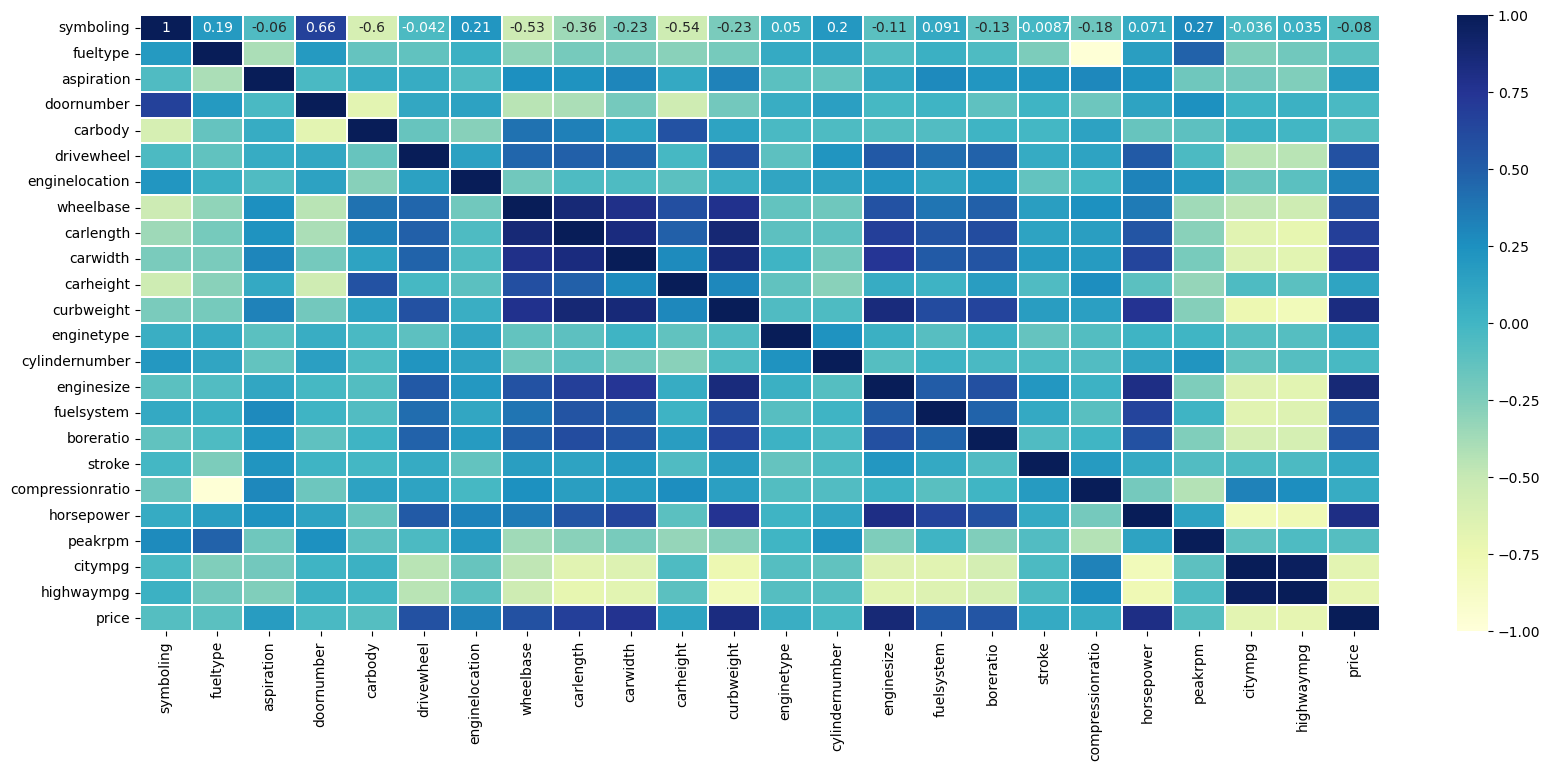

In [44]:
corrmatrix=df.corr()
#corrmatrix
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [45]:
x=df.drop('price',axis=1)
y=df["price"]

In [6]:
print("\n" + "="*80)
print("2. REGRESSION ALGORITHM IMPLEMENTATION")
print("="*80)



2. REGRESSION ALGORITHM IMPLEMENTATION


In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [47]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [48]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
lr_model=LinearRegression()

In [51]:
lr_model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
models={}
results={}

In [53]:
models["Linearregression"]=lr_model

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_scaled, y_train)
models['Decision Tree']=dt_model
print("trained decision tree")
y_pred_dt=dt_model.predict(x_test_scaled)
mse_dt = mean_squared_error(y_test,y_pred_dt)
print(mse_dt)

trained decision tree
5652871.50320425


In [55]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(random_state=42)
RF_model.fit(x_train_scaled,y_train)
models['RandomForest']=RF_model
print("trained random forest")

trained random forest


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(random_state =42)
gb_model.fit(x_train_scaled,y_train)
models["gradient Boost"]=gb_model
print("trained gradeint boost successfully")

trained gradeint boost successfully


In [57]:
from sklearn.svm import SVR
svr_model =SVR()
svr_model.fit(x_train_scaled,y_train)
models["support vector"]=svr_model
print("trained svr successfully")

trained svr successfully


In [58]:
models

{'Linearregression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'RandomForest': RandomForestRegressor(random_state=42),
 'gradient Boost': GradientBoostingRegressor(random_state=42),
 'support vector': SVR()}

In [59]:
for name,model in models.items():
    y_pred=model.predict(x_test_scaled)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)

    results[name]={
       "MSE" : mse,
       "MAE" : mae,
       "r2"  : r2,
       "RMSE":rmse
    }

    print(f"\n{name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared Score (R²): {r2:.4f}")


Linearregression:
  Mean Squared Error (MSE): 13845576.6854
  Root Mean Squared Error (RMSE): 3720.9645
  Mean Absolute Error (MAE): 2491.1279
  R-squared Score (R²): 0.7884

Decision Tree:
  Mean Squared Error (MSE): 5652871.5032
  Root Mean Squared Error (RMSE): 2377.5768
  Mean Absolute Error (MAE): 1627.8578
  R-squared Score (R²): 0.9136

RandomForest:
  Mean Squared Error (MSE): 3869044.5193
  Root Mean Squared Error (RMSE): 1966.9887
  Mean Absolute Error (MAE): 1394.3912
  R-squared Score (R²): 0.9409

gradient Boost:
  Mean Squared Error (MSE): 5275772.2968
  Root Mean Squared Error (RMSE): 2296.9049
  Mean Absolute Error (MAE): 1561.5237
  R-squared Score (R²): 0.9194

support vector:
  Mean Squared Error (MSE): 69779931.2463
  Root Mean Squared Error (RMSE): 8353.4383
  Mean Absolute Error (MAE): 5329.6218
  R-squared Score (R²): -0.0664


In [60]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [61]:
results_df = pd.DataFrame(results).T
print("\n--- Performance Comparison Table ---")
print(results_df.to_string())


--- Performance Comparison Table ---
                           MSE          MAE        r2         RMSE
Linearregression  1.384558e+07  2491.127904  0.788408  3720.964483
Decision Tree     5.652872e+06  1627.857838  0.913611  2377.576813
RandomForest      3.869045e+06  1394.391233  0.940872  1966.988693
gradient Boost    5.275772e+06  1561.523738  0.919374  2296.904939
support vector    6.977993e+07  5329.621825 -0.066397  8353.438289


In [62]:
best_model_r2 = results_df['r2'].idxmax()
worst_model_r2 = results_df['r2'].idxmin()
best_model_mse = results_df['MSE'].idxmin()
print(f"  R² Score: {results_df.loc[best_model_r2, 'r2']:.4f}")
print(f"  Reasoning: Highest R² indicates best variance explanation")
print(f"  This model captures {results_df.loc[best_model_r2, 'r2']*100:.2f}% of the variance")

  R² Score: 0.9409
  Reasoning: Highest R² indicates best variance explanation
  This model captures 94.09% of the variance


In [7]:
print("\n" + "="*80)
print("2. CROSS VALIDATION AND HYPERPARMETER TUNING")
print("="*80)



2. CROSS VALIDATION AND HYPERPARMETER TUNING


In [63]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
cv_results={}
for name,model in models.items():
    print(f"\nEvaluating {name}...")
    cv_scores = cross_val_score(model,x_train_scaled,y_train,
                                cv =5,scoring='r2',n_jobs=-1)
    cv_results[name]= { 
                 'Mean CV R2':cv_scores.mean(),
                 'Std CV R2' :cv_scores.std()
    }
    print(f"  Cross-validation R² scores: {cv_scores}")
    print(f"  Mean R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
cv_results_df = pd.DataFrame(cv_results).T
print("\n--- Cross-Validation Summary ---")
print(cv_results_df.to_string())



Evaluating Linearregression...
  Cross-validation R² scores: [0.85913634 0.79396107 0.75748507 0.79572706 0.85568814]
  Mean R² Score: 0.8124 (+/- 0.0784)

Evaluating Decision Tree...
  Cross-validation R² scores: [0.89309589 0.85453099 0.84896364 0.86283024 0.88552889]
  Mean R² Score: 0.8690 (+/- 0.0347)

Evaluating RandomForest...
  Cross-validation R² scores: [0.89788627 0.81987523 0.90984504 0.95273699 0.84120739]
  Mean R² Score: 0.8843 (+/- 0.0960)

Evaluating gradient Boost...
  Cross-validation R² scores: [0.90215093 0.84356993 0.91551422 0.9515405  0.89629566]
  Mean R² Score: 0.9018 (+/- 0.0698)

Evaluating support vector...
  Cross-validation R² scores: [-0.04294108 -0.13171898 -0.00830604 -0.27843448 -0.21974279]
  Mean R² Score: -0.1362 (+/- 0.2045)

--- Cross-Validation Summary ---
                  Mean CV R2  Std CV R2
Linearregression    0.812400   0.039222
Decision Tree       0.868990   0.017336
RandomForest        0.884310   0.048017
gradient Boost      0.901814   

In [64]:
tuned_models={}
tuning_results={}
tuned_models["Linear Regression"] = lr_model

In [65]:
dt_params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
dt_params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
dt_grid =GridSearchCV(DecisionTreeRegressor(random_state=42),
                      dt_params,cv=5,scoring='r2',n_jobs=-1)
dt_grid.fit(x_train_scaled,y_train)
print(f"  Best parameters: {dt_grid.best_params_}")
print(f"  Best CV R² Score: {dt_grid.best_score_:.4f}")
tuned_models['Decision Tree'] = dt_grid.best_estimator_
tuning_results['Decision Tree'] = dt_grid.best_params_

  Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
  Best CV R² Score: 0.8757


In [68]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
print(f"  Hyperparameters: {rf_params}")
rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                               rf_params, n_iter=20, cv=5, 
                               scoring='r2', random_state=42, n_jobs=-1)
rf_random.fit(x_train_scaled, y_train)
print(f"  Best parameters: {rf_random.best_params_}")
print(f"  Best CV R² Score: {rf_random.best_score_:.4f}")
tuned_models['Random Forest'] = rf_random.best_estimator_
tuning_results['Random Forest'] = rf_random.best_params_

  Hyperparameters: {'n_estimators': [100, 200, 300], 'max_depth': [20, 30, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
  Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}
  Best CV R² Score: 0.8880


In [69]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}
print(f"  Hyperparameters: {gb_params}")
gb_random = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), 
                               gb_params, n_iter=20, cv=5, 
                               scoring='r2', random_state=42, n_jobs=-1)
gb_random.fit(x_train_scaled, y_train)
print(f"  Best parameters: {gb_random.best_params_}")
print(f"  Best CV R² Score: {gb_random.best_score_:.4f}")
tuned_models['Gradient Boosting'] = gb_random.best_estimator_
tuning_results['Gradient Boosting'] = gb_random.best_params_

  Hyperparameters: {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]}
  Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.2}
  Best CV R² Score: 0.9020


In [70]:
svr_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf'],
    'epsilon': [0.01, 0.1, 0.2]
}

print(f"  Hyperparameters: {svr_params}")
svr_random = RandomizedSearchCV(SVR(), svr_params, n_iter=20, cv=5, 
                                scoring='r2', random_state=42, n_jobs=-1)
svr_random.fit(x_train_scaled, y_train)
print(f"  Best parameters: {svr_random.best_params_}")
print(f"  Best CV R² Score: {svr_random.best_score_:.4f}")
tuned_models['SVR'] = svr_random.best_estimator_
tuning_results['SVR'] = svr_random.best_params_

  Hyperparameters: {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01], 'kernel': ['rbf'], 'epsilon': [0.01, 0.1, 0.2]}
  Best parameters: {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.2, 'C': 100}
  Best CV R² Score: 0.0390


In [71]:
tuned_results={}
for name,model in tuned_models.items():
    y_pred =model.predict(x_test_scaled)
    mse = mean_squared_error(y_test,y_pred)
    mae =mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)

    tuned_results[name] = {
      'MSE':mse,
       'RMSE':rmse,
       'MAE':mae,
       'R2':r2
   }
    print(f"\n{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df.to_string())   


Linear Regression:
  MSE: 13845576.6854
  RMSE: 3720.9645
  MAE: 2491.1279
  R² Score: 0.7884

Decision Tree:
  MSE: 6519885.3872
  RMSE: 2553.4066
  MAE: 1777.3915
  R² Score: 0.9004

Random Forest:
  MSE: 3997321.5597
  RMSE: 1999.3303
  MAE: 1392.9792
  R² Score: 0.9389

Gradient Boosting:
  MSE: 5074997.5795
  RMSE: 2252.7755
  MAE: 1608.1171
  R² Score: 0.9224

SVR:
  MSE: 58609194.7694
  RMSE: 7655.6642
  MAE: 4399.7533
  R² Score: 0.1043
                            MSE         RMSE          MAE        R2
Linear Regression  1.384558e+07  3720.964483  2491.127904  0.788408
Decision Tree      6.519885e+06  2553.406624  1777.391452  0.900361
Random Forest      3.997322e+06  1999.330278  1392.979187  0.938912
Gradient Boosting  5.074998e+06  2252.775528  1608.117119  0.922442
SVR                5.860919e+07  7655.664228  4399.753336  0.104317


In [72]:
best_final_model = tuned_results_df['R2'].idxmax()
best_r2 = tuned_results_df.loc[best_final_model, 'R2']
best_rmse = tuned_results_df.loc[best_final_model, 'RMSE']
best_mae = tuned_results_df.loc[best_final_model, 'MAE']
print(f"\n{'='*60}")
print(f"BEST MODEL: {best_final_model}")
print(f"{'='*60}")
print(f"\nPerformance Metrics:")
print(f"  • R² Score: {best_r2:.4f}")
print(f"  • RMSE: {best_rmse:.4f}")
print(f"  • MAE: {best_mae:.4f}")


BEST MODEL: Random Forest

Performance Metrics:
  • R² Score: 0.9389
  • RMSE: 1999.3303
  • MAE: 1392.9792


In [76]:
df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [78]:
df.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
df["price"].mean()

13276.710570731706

In [4]:
print("Feature Selection")
print("="*80)

Feature Selection


In [86]:
from sklearn.feature_selection import SelectKBest, f_regression


selector = SelectKBest(score_func=f_regression, k=5)
x_selected_train = selector.fit_transform(x_train, y_train)
x_selected_test=selector.transform(x_test)

# Get selected feature names
selected_features = x_train.columns[selector.get_support()]
print("Selected features:", selected_features)

# Get scores for each feature
scores = pd.DataFrame({
    'feature': x_train.columns,
    'score': selector.scores_
}).sort_values('score', ascending=False)
print(scores)

Selected features: Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg'], dtype='object')
             feature       score
14        enginesize  439.507046
11        curbweight  321.097215
19        horsepower  266.022581
9           carwidth  206.839659
22        highwaympg  170.839244
21           citympg  157.134485
8          carlength  112.899089
5         drivewheel   68.460768
7          wheelbase   58.569903
16         boreratio   55.677055
15        fuelsystem   54.913860
6     enginelocation   13.871180
2         aspiration    3.196326
4            carbody    1.601510
20           peakrpm    1.044611
3         doornumber    0.584377
1           fueltype    0.514969
10         carheight    0.392819
17            stroke    0.353543
0          symboling    0.265821
18  compressionratio    0.198212
12        enginetype    0.063197
13    cylindernumber    0.004011


In [87]:
rf_model_2 =RandomForestRegressor(random_state=42)
rf_model_2.fit(x_selected_train,y_train)
y_pred_rf2=rf_model_2.predict(x_selected_test)

In [90]:
mse_rf2 = mean_squared_error(y_test,y_pred_rf2)
mae_rf2 =mean_absolute_error(y_test,y_pred_rf2)
r2_rf2= r2_score(y_test,y_pred_rf2)
rmse_rf2=np.sqrt(mse)

In [91]:
print(f"  Mean Squared Error (MSE): {mse_rf2:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf2:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_rf2:.4f}")
print(f"  R-squared Score (R²): {r2_rf2:.4f}")

  Mean Squared Error (MSE): 3915634.8377
  Root Mean Squared Error (RMSE): 2377.5768
  Mean Absolute Error (MAE): 1375.8285
  R-squared Score (R²): 0.9402
